In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import random
import pylab as pl
import numpy as np
%matplotlib inline

In [20]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [21]:
data_set = pd.read_csv('FuelConsumption.csv')

In [22]:
data_set.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [23]:
data_table_1 = data_set[['ENGINESIZE','CYLINDERS','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
data_table_1.head()

,ENGINESIZE,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,2.0,4,196,8.5
1,2.4,4,221,9.6
2,1.5,4,136,5.9
3,3.5,6,255,11.1
4,3.5,6,244,10.6


In [24]:
data_table_2 = data_set[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
data_table_2.head()

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effa3bc57f0>,
      dtype=object)

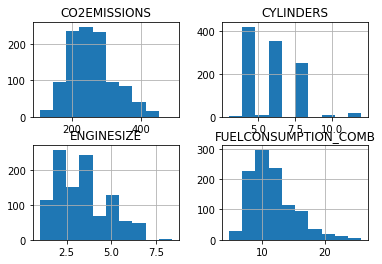

In [25]:
data_table_2.hist()


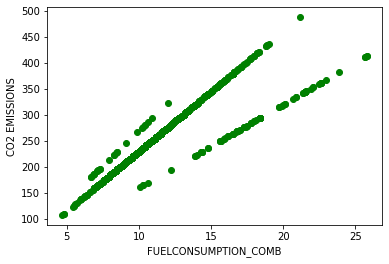

In [28]:
#Make a Scatter Plot
plt.scatter(data_table_1.FUELCONSUMPTION_COMB, data_table_1.CO2EMISSIONS,color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 EMISSIONS")
plt.show()

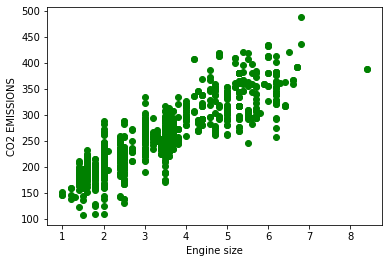

In [29]:
plt.scatter(data_table_1.ENGINESIZE, data_table_1.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("CO2 EMISSIONS")
plt.show()

In [39]:
#Split the dataset to 
split_data = np.random.rand(len(data_set)) < 0.8

In [40]:
split_data

array([False,  True,  True, ...,  True,  True,  True])

In [41]:
train_data = data_table_1[split_data]
test_data = data_table_1[~split_data]

In [43]:
regression = linear_model.LinearRegression()
regression.fit(train_data[['ENGINESIZE']] ,train_data[['CO2EMISSIONS']] )

LinearRegression()

In [45]:
Coeff = regression.coef_[0][0]
Intercept = regression.intercept_[0]
print("Coeff. : " , Coeff)
print("Intercept : " , Intercept)

Coeff. :  39.499785615257295
Intercept :  124.61489013442386


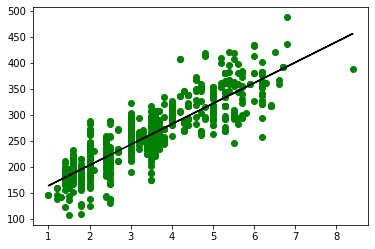

In [47]:
plt.scatter(train_data[['ENGINESIZE']] ,train_data[['CO2EMISSIONS']] , color = "green")
plt.plot(train_data[['ENGINESIZE']],train_data[['ENGINESIZE']]*Coeff+Intercept,color="black")

In [48]:
test_x = test_data['ENGINESIZE']
test_y = test_data['CO2EMISSIONS']
test_y_expected = (test_x*Coeff+Intercept)

In [53]:
print("Mean Absolut Error: " , np.mean(np.absolute(test_y_expected - test_y)))
print("Mean Square Error: " , np.mean((test_y_expected - test_y)**2))
print("R2 Score : " , r2_score(test_y_expected , test_y) )

Mean Absolut Error:  25.403216795316943
Mean Square Error:  1119.7568517816944
R2 Score :  0.6752854382129481
